In [1]:
from parameters_general import *
from parameters_GaAs_QW import *
from functions import gauss_pulse, sigma_pulse, fouriertrafo
import matplotlib.pyplot as plt

In [2]:
E_0 = 2*np.pi*hbar/d_cv*0.15#0.15
sigma = sigma_pump#750#300
t_c = 10000
detuning = 0.0

In [3]:
file_path = 'data_gießen/2022-05-23 26795 Linabs and Pump.txt'
start = 300
stop = 1100

# Load the data from the .txt file into a NumPy array
data = np.loadtxt(file_path)

# If you want to access individual columns, you can slice the array:
energy = data[:, 0][start:stop]
omegas = energy/hbar
absorption = data[:, 1][start:stop]
pulse = data[:, 2][start:stop]

def gaussian_fourier(omega, E_0,sigma,omega_0):
    return E_0*np.exp((-(omega-omega_0)**2*sigma**2)/2)

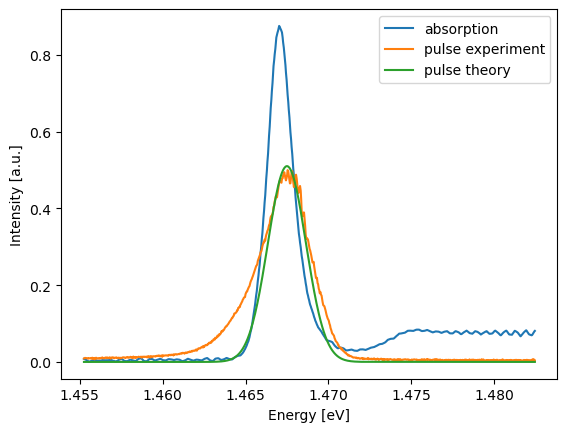

In [7]:
plt.plot(energy, absorption, label = 'absorption')
plt.plot(energy, pulse, label = 'pulse experiment')
plt.plot(energy, np.abs(fouriertrafo(2200*gauss_pulse(tlist,E_0,sigma, t_c, detuning=0, chirp = 0)**2,omega_list= energy/hbar - 1.4675/hbar, tlist = tlist)), label = r'pulse theory')
#plt.plot(energy, np.abs(gaussian_fourier(E_0,300,energy/hbar - 1.4675/hbar))**2, label = 'FWHM=500')
plt.legend()
plt.xlabel('Energy [eV]')
plt.ylabel('Intensity [a.u.]')
plt.savefig('electric_field.pdf')
plt.show()

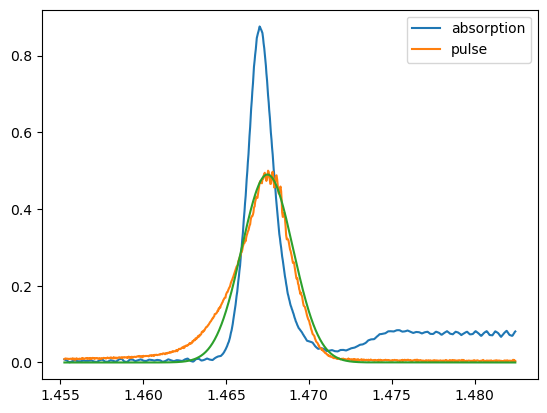

In [17]:
sigma = 300
E_0 = 0.7
plt.plot(energy, absorption, label = 'absorption')
plt.plot(energy, pulse, label = 'pulse')
#plt.plot(energy, np.abs(fouriertrafo(gauss_pulse(tlist,E_0,sigma, t_c, detuning=0, chirp = 0),omega_list= energy/hbar - 1.4675/hbar))**2, label = 'theory_pulse')
plt.plot(energy, np.abs(gaussian_fourier(energy/hbar,E_0,sigma,1.4675/hbar))**2, label = '')
plt.legend()
plt.show()

Angepasste Parameter:
Amplitude (A): 1.8301856060501733
Zentralfrequenz (nu_0): 314.00466658954633
Breite (sigma): 2.2297618730588975
Phase (phi): -1.1809856718738152
Chirp-Steigung (k): -17.20428466796875


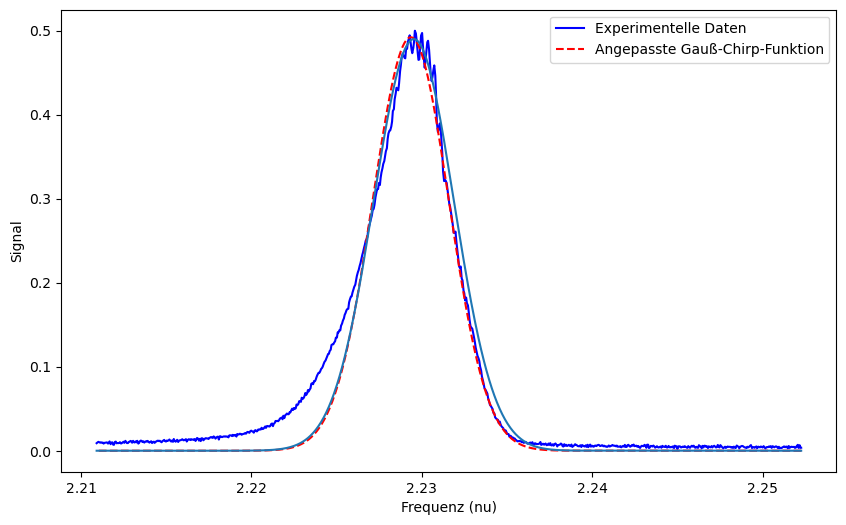

In [5]:

from scipy.optimize import curve_fit

def gaussian_fourier_sq(omega, E_0,sigma,omega_0, phi, k):
    return np.abs(E_0*np.exp((-(omega-omega_0)**2*sigma**2)/2)* np.cos(phi + k * (omega - omega_0)))**2
# Definition der Gauß-Funktion mit linearem Chirp
def gauss_chirp(nu, A, nu_0, sigma, phi, k):
    return A * np.exp(-((nu - nu_0) ** 2) / (2 * sigma ** 2)) * np.cos(phi + k * (nu - nu_0))

# Daten aus experiment
nu = omegas #x-werte
y_exp = pulse #y-werte

# Anpassen der Gauß-Funktion mit linearem Chirp an die experimentellen Daten
initial_guess = [0.7,300, 1.4675/hbar,0,-100]  # Erste Schätzung der Parameter
popt, pcov = curve_fit(gaussian_fourier_sq, nu, y_exp, p0=initial_guess,method = 'dogbox', maxfev = 100000,xtol = 1e-12, gtol = 1e-12)

# Ergebnisse ausgeben
print("Angepasste Parameter:")
print("Amplitude (A):", popt[0])
print("Zentralfrequenz (nu_0):", popt[1])
print("Breite (sigma):", popt[2])
print("Phase (phi):", popt[3])
print("Chirp-Steigung (k):", popt[4])

# Angepasste Kurve plotten
y_fit = gaussian_fourier_sq(nu, *popt)

plt.figure(figsize=(10, 6))
plt.plot(nu, y_exp, 'b-', label='Experimentelle Daten')
plt.plot(nu, y_fit, 'r--', label='Angepasste Gauß-Chirp-Funktion')
plt.plot(nu,gaussian_fourier_sq(nu, 0.7,300,1.4675/hbar,0,0))
plt.xlabel('Frequenz (nu)')
plt.ylabel('Signal')
plt.legend()
plt.show()

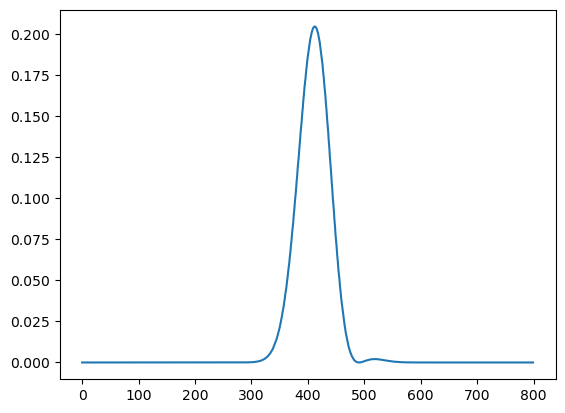

In [14]:
plt.plot(gaussian_fourier_sq(nu, 0.7,400,1.4675/hbar, -1,200))

In [8]:
print(sigma_pump)

810.1570647264605
